### *“There is no elevator to success, you have to take the stairs.”* 
*-Zig Ziglar, a salesman, author, and motivational Speaker* 

*When you finally make it to the top, you feel awesome so keep going! -Dr.R*

----

YOUR NAME HERE: Travis Kerr

----

In [ ]:
import numpy as np                 #for processing arrays (columns)
import pandas as pd                #for processing dataframes  (tables)
import sqlite3 as sql              #for SQL of course!
import matplotlib.pyplot as plt    #for making visualizations!
plt.style.use('fivethirtyeight')   #A helpful style package

# Lab: Histograms

Histograms allow us to see the shape or distribution of a quantitative continuous variable.  Sometimes, if a quantitiate discrete variable has lots of possible values, we might create a histogram for discrete data too.

We now use an example that involves the top movies in a variety of years.  We also had access to their gross revenus, adjusted for the differences in years.  Let's read in that data now.

In [ ]:
try:
    movies = pd.read_csv('top_movies.csv')
    movies["adj_gross"] = np.round(movies["adj_gross"]/1000000, 2)
    movies

    #Read in the needed csvs and create the DB
    conn = sql.connect('movies.db')
    movies.to_sql('movies', conn,  index = False)

except:
    
    print("Issue during DB creation/connection")

Issue during DB creation/connection


In [ ]:
sql_statement = """SELECT * FROM  movies"""

movies = pd.read_sql_query(sql_statement, conn)
movies

,title,studio,gross,adj_gross,year
0,Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906.72,2015
1,Avatar,Fox,760507625,846.12,2009
2,Titanic,Paramount,658672302,1178.63,1997
3,Jurassic World,Universal,652270625,687.73,2015
4,Marvel's The Avengers,Buena Vista (Disney),623357910,668.87,2012
...,...,...,...,...,...
195,The Caine Mutiny,Columbia,21750000,386.17,1954
196,The Bells of St. Mary's,RKO,21333333,545.88,1945
197,Duel in the Sun,Selz.,20408163,443.88,1946
198,Sergeant York,Warner Bros.,16361885,418.67,1941


Run the following cell to find the mean adjusted gross, plus other stats.

Note: The ```describe()`` is a python function that quiclly runs some stats on columnar data.

In [ ]:
stats = movies.describe()
stats  

,gross,adj_gross,year
count,2.000000e+02,200.00000,200.000000
mean,2.216196e+08,504.19800,1986.620000
std,1.441574e+08,215.98167,20.493548
min,9.183673e+06,322.26000,1921.000000
25%,1.087824e+08,367.77750,1973.000000
50%,2.001273e+08,438.86000,1990.000000
75%,3.069535e+08,551.21000,2003.250000
max,9.067234e+08,1757.79000,2015.000000


Now store the mean for the adj_gross into a variable by using double bracket notation.

In [ ]:
avg_movie_gross = stats["adj_gross"]["mean"]
avg_movie_gross      #504.19800000000004 should print

504.19800000000004

On average, we see that the top movie (in terms of gross) makes about 504 million dollars.  This average doesn't tell us everything about the gross of movies though.  We often rely on *histograms* to show us the full picture, ie, the full distribution of the data.  

Below we generate the histogram for the adjusted gross of the top movies. Also, we use ``scatter`` to show the mean of the data on the histogram.

Text(0.5, 1.0, 'Adjusted Gross of Top Movies')

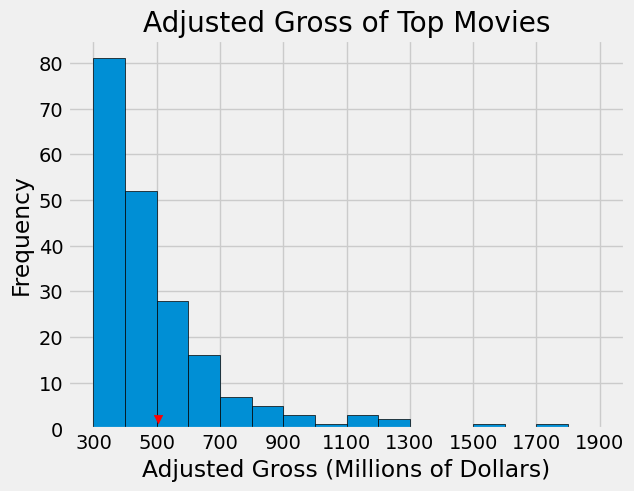

In [ ]:
plt.hist(movies['adj_gross'], edgecolor = 'black', bins = np.arange(300,2000, 100), zorder=1)
plt.scatter(avg_movie_gross,2, color = 'red', marker="v", zorder=2)
plt.xticks(np.arange(300,2000, 200))
plt.xlabel('Adjusted Gross (Millions of Dollars)')
plt.ylabel('Frequency')
plt.title('Adjusted Gross of Top Movies')

### Analyzing the distribution of the data

Now let's interpret the above histogram.

So yes, the mean might be about 500 million dollars, but thanks to this histogram, we see that the adjusted gross of these top movies could range from 300 to about 1800, with a high emphasis on 300-700 million dollars and a long tail of less likely adjusted gross values falling to the right.  In summary, we learn so much more from this histogram that we did from just knowing the mean.

We use the term *bins* to discuss the categories/ranges created by each bar in the histogram. So the first bin is 300-400 million dollars, followed by 400-500, 500-600, etc.  By default, if a data point falls at a tick exactly between two bins, that data point is included in the count of the higher bin. So for example, if a movie were to gross exactly 500 million dollars, it would be included in the 500-600 bin but not the 400-500 bin.

Even though the mean adjusted gross is about 504  million dollars, we have a much better understanding of the data thanks to the histogram above.  We see that most frequent bin is 300-400 million and that most of the top movies have a range of 300-700 million dollars.

Also, we see that there are high grossing outliers that pull up the mean.  Due to the long tail to the right, we call this a *right-skewed* or *postive-skewed* distribution.   If the tail were to the left, it would be a **left skewed** distribution. 

It is important to note that in a right skewed distribution, the mean appears to the right of the median. Let's prove that to ourselves.  

In [ ]:
# Recall what's inside the stats data frame
stats

,gross,adj_gross,year
count,2.000000e+02,200.00000,200.000000
mean,2.216196e+08,504.19800,1986.620000
std,1.441574e+08,215.98167,20.493548
min,9.183673e+06,322.26000,1921.000000
25%,1.087824e+08,367.77750,1973.000000
50%,2.001273e+08,438.86000,1990.000000
75%,3.069535e+08,551.21000,2003.250000
max,9.067234e+08,1757.79000,2015.000000


Set the ```median_adj_gross``` to be the median of the adj_gross column.   Note that the ```median_adj_gross``` is the 50th percentile of the adj_gross column.

In [ ]:
median_adj_gross = stats["adj_gross"]["50%"]
median_adj_gross, avg_movie_gross       #(438.86, 504.19800000000004) should print

(438.86, 504.19800000000004)

Yes, we see that the mean is to the right of the median, ie, the mean is larger than the median.  

The median cuts the data in half. Since the median is ~439 million, 50% of movies have an adjusted gross value of leses than this value, and 50% also fall above it.  The mean is larger/to the right of the median because the outliers in the long tail to the right forces the mean to move up from the median.

### Understanding the code

Let's understand the code above, specifically, these 3 lines.

```plt.hist(movies['adj_gross'], edgecolor = 'black', bins = np.arange(300,2000, 100), zorder=1)```
```plt.scatter(avg_movie_gross,2, color = 'red', marker="v", zorder=2)```
```plt.xticks(np.arange(300,2000, 200))```

Notice that ```plt.hist(....```) takes in ONE column of data - Here, the ```movies['adj_gross']``` column.  Based on the bins you give ```plt.hist```, Python will count up how many values from this column fall in each bin.  Here's its other parameters.

* ```bins = np.arange(300,2000, 100)```:  Here we tell Python what our bins (blue bar categories) should be by specifying this list:  300, 400, 500, ...., 1900.  If we do not provide this detail, Python will generate bins starting at the min of the data and going to the max of the data.  **It is best practice to define the bins on your own** so that it is easy for the ready to determine the bin categories.  **Usually, I run the describe function and check out the min/max to help me define what my bins should be.**

* ```edgecolor = 'black'```: We ask Python to please outline each bar with a black edge

* The parameters of ```zorder=1``` and ```zorder=2``` in the ```plt.hist``` and ```plt.scatter``` functions force that the histogram is plotted first and the scatter plot is drawn second.

* In the ```plt.scatter``` call, notice we used ```marker = 'v'``` to get the upside down triangle.

###  We did we use both ```bins = np.arange(300,2000, 100)``` and ```plt.xticks(np.arange(300,2000, 200))```?

We also included the line of code below.  This code allowed us to label each tick at every other bin category to make the x-axis less messy or to line up better. 
* ```plt.xticks(np.arange(300,2000, 200))```


---

## **Question 1**

Redraw the histogram below but label every 3rd tickmark instead of every second:  300, 600, 900, ...

Text(0.5, 1.0, 'Adjusted Gross of Top Movies')

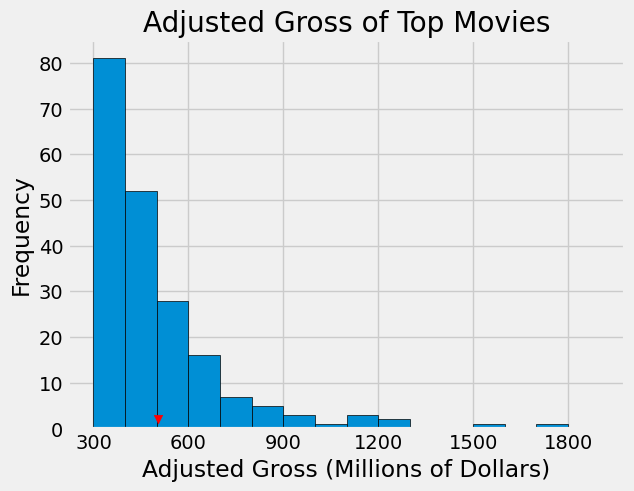

In [ ]:
#Code goes here
plt.hist(movies['adj_gross'], edgecolor = 'black', bins = np.arange(300,2000, 100), zorder=1)
plt.scatter(avg_movie_gross,2, color = 'red', marker="v", zorder=2)
plt.xticks(np.arange(300,2000, 300))
plt.xlabel('Adjusted Gross (Millions of Dollars)')
plt.ylabel('Frequency')
plt.title('Adjusted Gross of Top Movies')

---

## **Question 2**

Looking at the original histogram and **eyeballing**, how many top movies had a gross of at least \$900 million?  (Answer the question by showing me what numbers you are adding for each category.)

In [ ]:
num_movies_more_than_900 = 3 + 1 + 3 + 2 + 1 + 1
num_movies_more_than_900

11

---

## **Question 3**

Answer the same question as above with SQL code instead of eyeballing. 

In [ ]:
#SQL code here
sql_statement = """ SELECT COUNT(*)
                   FROM movies
                   WHERE adj_gross > 900 """

num_movies_more_than_900 = pd.read_sql_query(sql_statement, conn)
num_movies_more_than_900

,COUNT(*)
0,11


---

# Using the outputs of ``plt.hist``

Instead of eyeleballing or using SQL, we can actually use the output returned by the ``plt.hist`` function.

Run the following code cell and check out all the text printed at the top.   The ``plt.hist`` function is trying to tell you lots of good info.  It is returning to you 2 arrays:  One telling you the counts of all the bins and the second telling you the endpoints of the bins.

(array([81., 52., 28., 16.,  7.,  5.,  3.,  1.,  3.,  2.,  0.,  0.,  1.,
         0.,  1.,  0.]),
 array([ 300.,  400.,  500.,  600.,  700.,  800.,  900., 1000., 1100.,
        1200., 1300., 1400., 1500., 1600., 1700., 1800., 1900.]),
 <BarContainer object of 16 artists>)

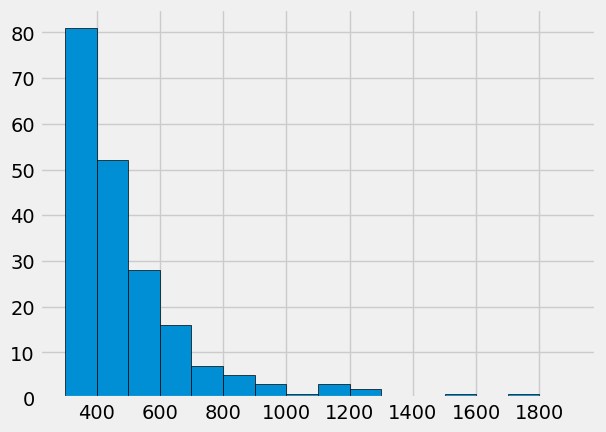

In [ ]:
output = plt.hist(movies['adj_gross'], edgecolor = 'black', bins = np.arange(300,2000, 100), zorder=1)
output

So the output from ``plt.hist`` tells you that:

* The counts in each bin are: 
  * 81, 52, 28, 16,  7,  5,  3,  1,  3,  2,  0,  0,  1, 0,  1, 0
* The endpoints of the bins are: 
  * 300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, **1900**

This means that each of the above arrays have **almost** the same length.  The second array has one more value of the first because it includes the starting points of each bin plus an additional value for the ending value of the final bin, which here was 1900. 

So we could have answered the previous questions without eyeballing or using SQL!  

We see that 900 was the start of the 7th number in the list, so we could have added up all counts from the 7th number in the list onwards:

In [ ]:
3 +  1 + 3 +  2 + 0 + 0 + 1 + 0 + 1 + 0

11

Since the ``plt.hist`` function is usually your first line, you might have to store the output of the plt.hist function and print it later to see these arrays of bins/counts.  Check out how I did this below by using the ``bin_info`` variable.

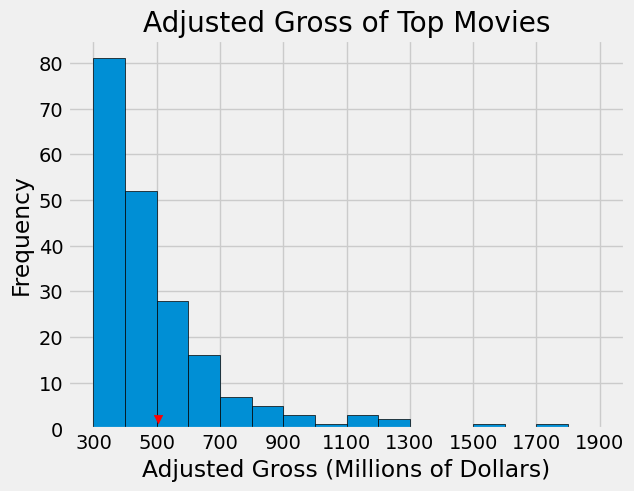

In [ ]:
#bin_info will capture the output and show it to you later, if you need it.

bin_info = plt.hist(movies['adj_gross'], edgecolor = 'black', bins = np.arange(300,2000, 100), zorder=1)
plt.scatter(avg_movie_gross,2, color = 'red', marker="v", zorder=2)
plt.xticks(np.arange(300,2000, 200))
plt.xlabel('Adjusted Gross (Millions of Dollars)')
plt.ylabel('Frequency')
plt.title('Adjusted Gross of Top Movies')
bin_info;

---

## **Question 4**

Look at the output (so ``bin_info``) and calculate how many movies had a gross of 500-700?

In [ ]:
#Add the correct numbers here
num_between_500_700 = 28 + 16 + 7
num_between_500_700     #should print 51 if you did it right

51

---

# Showing percentages instead of counts

We often want to show percentages not counts on the y-axis.  We can ``trick`` Python into doing this.  

To show percentages, first just weight every data point not by 1 but by $1/n$ where $n$ is the total number of data points.  We will use the ```np.ones``` function to help us.

In [ ]:
#Run this cell to see that np.ones(5) creates 5 ones.
np.ones(5)

array([1., 1., 1., 1., 1.])

In [ ]:
#Run this cell to see that np.ones(12) creates 12 ones.
np.ones(12)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

To weight every data point (here adjusted gross for a movie) appropriately, we create a ``multipliers`` array that contains $n$ values of $1/n$.

In [ ]:
#Run this cell to generate the 
num_rows = len(movies)
multipliers = np.ones(num_rows)* 100 / num_rows  #Divide each of our 1's by n and multiply by 100 
                                                  #so we can look at this on a 0-100 percent scale.
multipliers

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.

Now just pass this ``multipliers`` array in as weights to the ``hist`` function via the ``weights`` parameter and change the y-axis label to ```"Percentage"```.

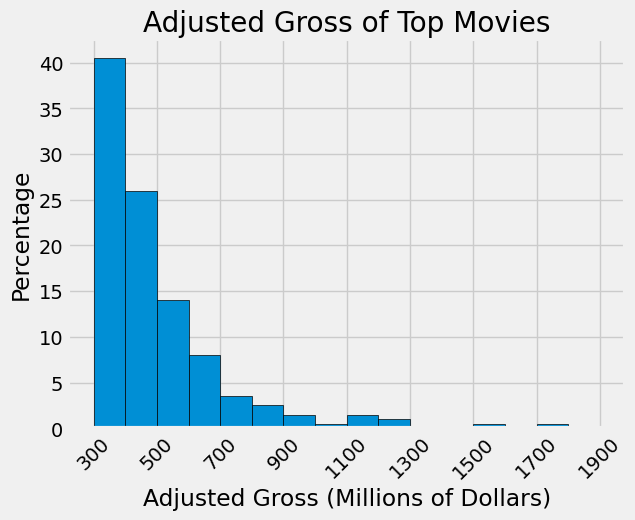

In [ ]:
#Here we tracking python into plotting percents, not counts by using the multipliers array as weights.

#Fill in the ???s below.

plt.hist(movies['adj_gross'], edgecolor = 'black', bins = np.arange(300,2000, 100), weights = multipliers)
plt.xticks(np.arange(300,2000, 200))
plt.xlabel('Adjusted Gross (Millions of Dollars)')
plt.ylabel('Percentage')
plt.title('Adjusted Gross of Top Movies')
plt.xticks(rotation=45);


Walah!  We have percentages on the y-axis.

We now close the connection to our db so we can switch datasets.

In [ ]:
conn.close()

---
# Changing data sets

Let's load in some more data. The ``crime_2017.csv`` file contains the number of crimes committed in each state of the USA.  The results are broken down by different weapons.  Read over the column titles to familiarize yourself with the variables.

In [67]:
try:
    crimes = pd.read_csv("crime_2017.csv")

    #Read in the needed csvs and create the DB
    conn = sql.connect('crimes.db')
    crimes.to_sql('crimes', conn,  index = False)

except:
    
    print("Issue during DB creation/connection")

Issue during DB creation/connection


In [65]:
sql_statement = """ SELECT  * FROM crimes"""

num_movies_more_than_900 = pd.read_sql_query(sql_statement, conn)
num_movies_more_than_900

,state,population_21,total_murders,total_firearms,handguns,rifles,shotguns,firearms_unknown,knives_or_cutting_instruments,other_weapons
0,Alabama,4934193,2,1,0,0,0,1,NaN,1
1,Alaska,724357,62,37,7,3,3,24,13.0,8
2,Arizona,7520103,404,249,162,8,9,70,50.0,93
3,Arkansas,3033946,250,168,92,11,4,61,23.0,52
4,California,39613493,1830,1274,886,37,34,317,258.0,195
5,Colorado,5893634,218,137,88,7,4,38,37.0,22
6,Connecticut,3552821,102,72,30,0,1,41,11.0,9
7,Delaware,990334,52,44,20,0,1,23,3.0,4
8,District of Columbia,714153,116,90,89,0,0,1,15.0,5
9,Georgia,10830007,672,542,490,15,5,32,37.0,85


## Question 5

**A)**  We're going to make a histogram showing the distribution of the total murders per state in 2017.  To prep for this, let's just look at the default histogram before we select the bins or add anything special.



(array([25.,  9.,  7.,  5.,  2.,  0.,  0.,  1.,  0.,  1.]),
 array([   2. ,  184.8,  367.6,  550.4,  733.2,  916. , 1098.8, 1281.6,
        1464.4, 1647.2, 1830. ]),
 <BarContainer object of 10 artists>)

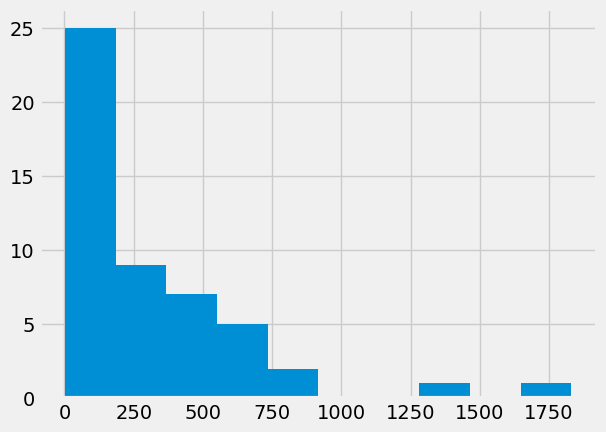

In [ ]:
# Just replace the ellipsis with the columns - nothing else. 
# So do NOT put "bins = ..." below.

plt.hist(crimes['total_murders'])

**B)**  Based on the above histogram, we see that the values for murders range from o to about 1850.  So let's use bins from 0-2000 that go up by 100 for our histogram.

Make a histogram for the number of murders per state in the US.  

Make it look like this one below, exactly.

**Notice percents and not counts are shown.**

![HistCrimes](https://raw.githubusercontent.com/kathleen-ryan-DeSales/CS250/main/pictures/Murder2017.png)

In [ ]:
#Here do the work to set up the multipliers array since we want percents
num_rows = len(crimes)
multipliers = np.ones(num_rows)* 100 / num_rows  

multipliers

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

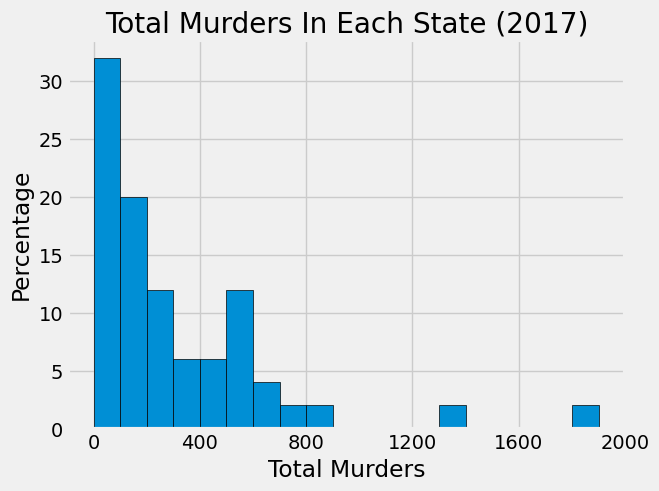

In [ ]:
#Here create the histogram
output = plt.hist(crimes['total_murders'], edgecolor = 'black', bins = np.arange(0,2000, 100), weights = multipliers)
plt.xticks(np.arange(0,2001, 400))
plt.xlabel('Total Murders')
plt.ylabel('Percentage')
plt.title('Total Murders In Each State (2017)');

Clearly the total murders distribution is skewed RIGHT again, which we can see due to the long tail extending to the right.  

We can use the ``describe`` function to see that the mean number of murders is 302.56 and the median is 178. This means the outlier states bring the mean up from the median.  Since the mean is to the right of the median, it is skewed right.

In [ ]:
#Run the describe function
stats_crimes = crimes.describe()
stats_crimes

,population_21,total_murders,total_firearms,handguns,rifles,shotguns,firearms_unknown,knives_or_cutting_instruments,other_weapons
count,5.000000e+01,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,49.000000,50.000000
mean,6.187980e+06,302.560000,219.64000,140.640000,8.060000,5.280000,65.660000,32.469388,37.180000
std,7.165641e+06,354.568617,264.20383,185.384516,11.613521,7.065409,84.355083,43.200647,40.090556
min,5.810750e+05,2.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.790925e+06,54.500000,38.75000,17.000000,1.000000,1.000000,8.000000,9.000000,5.750000
50%,4.385076e+06,178.000000,122.50000,81.500000,4.000000,3.000000,32.000000,20.000000,24.500000
75%,7.376142e+06,469.500000,331.50000,184.500000,11.000000,7.750000,89.500000,42.000000,50.000000
max,3.961349e+07,1830.000000,1274.00000,886.000000,58.000000,34.000000,352.000000,258.000000,195.000000


In [ ]:
#Set up the mean and median variables for the total_murders column
mean_murders_per_state = stats_crimes["total_murders"]["mean"]
median_murders_per_state = stats_crimes["total_murders"]["50%"]
median_murders_per_state, mean_murders_per_state    #should print (178.0, 302.56)

(178.0, 302.56)

**C)**  Rerun your above histogram saving the output of ``plt.hist`` into an ```output``` variable.  Then run the cell below.  Based on the cell outputs, answer:  Exactly what percentage of states had between 500 and 600 total murders in 2017?  Write your answer in the cell provided below.

In [ ]:
output

(array([32., 20., 12.,  6.,  6., 12.,  4.,  2.,  2.,  0.,  0.,  0.,  0.,
         2.,  0.,  0.,  0.,  0.,  2.]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000., 1100., 1200., 1300., 1400., 1500., 1600., 1700.,
        1800., 1900.]),
 <BarContainer object of 19 artists>)

*The percentage of states that had 500 to 600 murders is 12%.*

Click __here__ for the answer.

<!--
The answer should be 12%, ie, 12% of states had between 500 and 600 total murders in 2017

Look at the second array -> 500 is the start of the 6th bin.
So find the 6th number in the first array: We see it is 12.  Since percents we're computed, this is a percent, not a frequency.
-->

## Question 6

A) Create a histogram of the state populations, in millions.  Get this histogram exactly.

![StatePopulations](https://raw.githubusercontent.com/kathleen-ryan-DeSales/CS250/main/pictures/PopStates2021.PNG)

HINT:  You could use a SQL statement or a Python statement to deal with the "in millions" piece of this problem.  If using SQL, you should add a cell below and run a SQL command first.  If trying to do this by Python, note that dividing a column by say 100, for example, will divide each element in the column by 100.  

In [38]:
stats = crimes.describe()
stats

,population_21,total_murders,total_firearms,handguns,rifles,shotguns,firearms_unknown,knives_or_cutting_instruments,other_weapons
count,5.000000e+01,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,49.000000,50.000000
mean,6.187980e+06,302.560000,219.64000,140.640000,8.060000,5.280000,65.660000,32.469388,37.180000
std,7.165641e+06,354.568617,264.20383,185.384516,11.613521,7.065409,84.355083,43.200647,40.090556
min,5.810750e+05,2.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.790925e+06,54.500000,38.75000,17.000000,1.000000,1.000000,8.000000,9.000000,5.750000
50%,4.385076e+06,178.000000,122.50000,81.500000,4.000000,3.000000,32.000000,20.000000,24.500000
75%,7.376142e+06,469.500000,331.50000,184.500000,11.000000,7.750000,89.500000,42.000000,50.000000
max,3.961349e+07,1830.000000,1274.00000,886.000000,58.000000,34.000000,352.000000,258.000000,195.000000


In [41]:
statement = """SELECT population_21 / 1000000 AS population_in_millions
               FROM crimes"""

crimes = pd.read_sql_query(statement, conn)
crimes

,population_in_millions
0,4
1,0
2,7
3,3
4,39
5,5
6,3
7,0
8,0
9,10


In [39]:
#code for multiplier here
num_rows = len(crimes)
multipliers = np.ones(num_rows)* 100 / num_rows  

multipliers

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

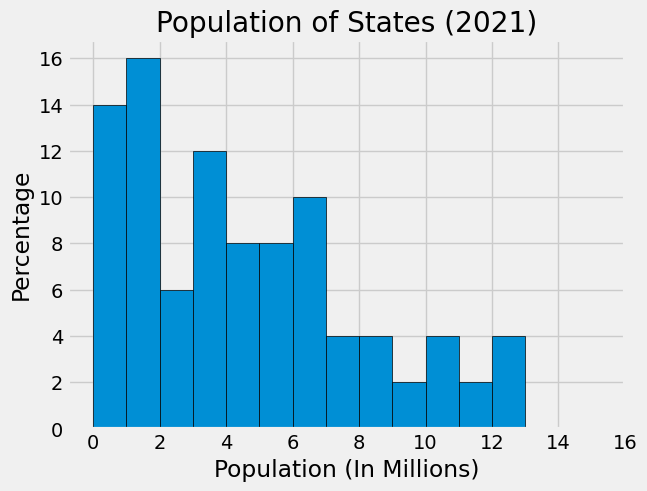

In [42]:
#code for histogram here
plt.hist(crimes['population_in_millions'], edgecolor = 'black', bins = np.arange(0, 16, 1), weights = multipliers)
plt.xticks(np.arange(0, 18, 2))
plt.xlabel('Population (In Millions)')
plt.ylabel('Percentage')
plt.title('Population of States (2021)');

B) Using ``describe`` (see below two cells), store the 75th percentile (which winds up being 7.4 million - precisely ```7.37614225``` million). Afterwards, add a red upside triangle to your histogram above to show where the 75th percentile is.** 

In [43]:
#Rerun to see what's in stats_crimes
stats_crimes

,population_21,total_murders,total_firearms,handguns,rifles,shotguns,firearms_unknown,knives_or_cutting_instruments,other_weapons
count,5.000000e+01,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,49.000000,50.000000
mean,6.187980e+06,302.560000,219.64000,140.640000,8.060000,5.280000,65.660000,32.469388,37.180000
std,7.165641e+06,354.568617,264.20383,185.384516,11.613521,7.065409,84.355083,43.200647,40.090556
min,5.810750e+05,2.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.790925e+06,54.500000,38.75000,17.000000,1.000000,1.000000,8.000000,9.000000,5.750000
50%,4.385076e+06,178.000000,122.50000,81.500000,4.000000,3.000000,32.000000,20.000000,24.500000
75%,7.376142e+06,469.500000,331.50000,184.500000,11.000000,7.750000,89.500000,42.000000,50.000000
max,3.961349e+07,1830.000000,1274.00000,886.000000,58.000000,34.000000,352.000000,258.000000,195.000000


In [44]:
percentile_pop_75 = stats_crimes["population_21"]["75%"] / 1000000
percentile_pop_75        #Should print 7.37614225 since we want this in millions

7.37614225

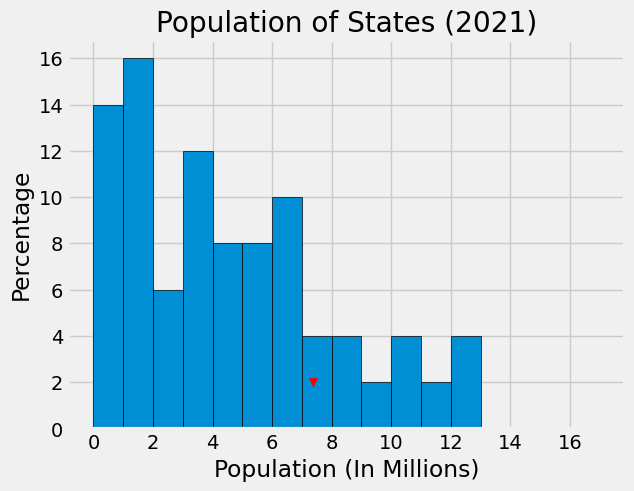

In [45]:
#Copy and paste the code for your histogram above and add the triangle for the 75th percentile!
plt.hist(crimes['population_in_millions'], edgecolor = 'black', bins = np.arange(0, 18, 1), weights = multipliers, zorder = 1)
plt.scatter(percentile_pop_75, 2, color = 'red', marker="v", zorder= 2)
plt.xticks(np.arange(0, 18, 2))
plt.xlabel('Population (In Millions)')
plt.ylabel('Percentage')
plt.title('Population of States (2021)');

---

# Comparing Two Histograms on the Same Plot.

We can compare the distribution of 2 histograms on the same plot.   

If one distribution appears on top of the other, we can use the alpha parameter to set the transparency to a value from 0-1.  So for example, if you set alpha = 0.5, then the plot will be 50% see-through.


## Question 7

It is reasonable that the more populated states have more murders.  Let's compare the distributions of murders ih highly populated states with less populated states.  

We'll consider a highly populated state to be one in the top quartile, ie, above the 75th percentile, so all states with a population of more than 7.4 millon.  

A) Let's divide our data into highly populated and less populated countries.

In [57]:
sql_statement = """ SELECT  * 
                    FROM crimes 
                    WHERE population_21/1000000 >= 7.4"""

most_populated = pd.read_sql_query(sql_statement, conn)
most_populated

,state,population_21,total_murders,total_firearms,handguns,rifles,shotguns,firearms_unknown,knives_or_cutting_instruments,other_weapons
0,California,39613493,1830,1274,886,37,34,317,258.0,195
1,Georgia,10830007,672,542,490,15,5,32,37.0,85
2,Illinois,12569321,814,693,596,24,3,70,53.0,50
3,Michigan,9992427,567,381,185,13,12,171,55.0,101
4,New Jersey,8874520,324,242,175,7,4,56,42.0,29
5,New York,19299981,547,292,233,6,9,44,113.0,91
6,North Carolina,10701022,547,413,279,9,26,99,33.0,64
7,Ohio,11714618,682,485,226,5,11,243,46.0,128
8,Pennsylvania,12804123,735,567,452,11,8,96,63.0,73
9,Texas,29730311,1364,1012,594,40,26,352,156.0,131


In [58]:
sql_statement = """ SELECT  * 
                    FROM crimes 
                    WHERE population_21/1000000 < 7.4 """

less_populated = pd.read_sql_query(sql_statement, conn)
less_populated

,state,population_21,total_murders,total_firearms,handguns,rifles,shotguns,firearms_unknown,knives_or_cutting_instruments,other_weapons
0,Alabama,4934193,2,1,0,0,0,1,NaN,1
1,Alaska,724357,62,37,7,3,3,24,13.0,8
2,Arizona,7520103,404,249,162,8,9,70,50.0,93
3,Arkansas,3033946,250,168,92,11,4,61,23.0,52
4,Colorado,5893634,218,137,88,7,4,38,37.0,22
5,Connecticut,3552821,102,72,30,0,1,41,11.0,9
6,Delaware,990334,52,44,20,0,1,23,3.0,4
7,District of Columbia,714153,116,90,89,0,0,1,15.0,5
8,Hawaii,1406430,39,4,1,1,0,2,9.0,10
9,Idaho,1860123,28,13,8,4,1,0,6.0,3


B) Now let's plot 2 histograms on one.  First we plot the distribution of the total murders for the highly populated states and then we do the same for the low populated states.

First set up the multipliers for each of the 2 dataframes: ```most_populated``` and ```less_populated```.  We have to do this because each table has a different number of rows.

In [59]:
#Multipliers for the highly populated states 
num_rows_most_pop = len(most_populated)
multipliers_most_pop = np.ones(num_rows_most_pop) * 100 / num_rows_most_pop

In [60]:
#Multipliers for the less populated states 
num_rows_less_pop = len(less_populated)
multipliers_less_pop = np.ones(num_rows_less_pop) * 100 / num_rows_less_pop

Now plot the histograms!  

Set the transparency of the low populated states to 50% by setting the ```alpha``` parameter of the low populated states to .50.

Text(0.5, 1.0, 'Population of States (2021)')

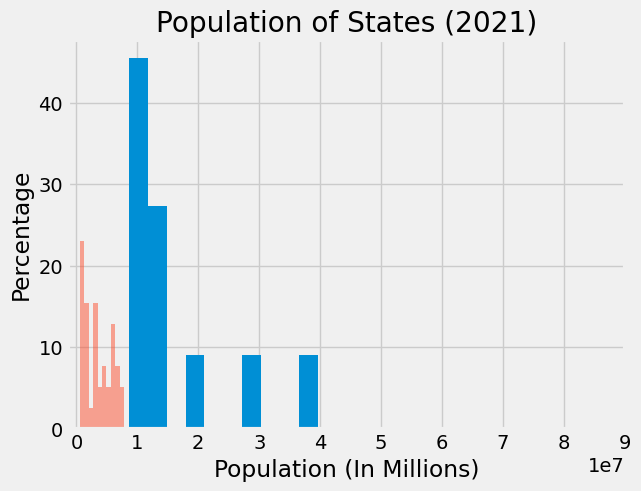

In [64]:
#histogram code here - need to use plt.hist twice!
plt.hist(most_populated["population_21"], weights = multipliers_most_pop)
plt.hist(less_populated["population_21"], alpha = .50, weights = multipliers_less_pop)
plt.xticks(np.arange(0, 100000000, 10000000))
plt.xlabel('Population (In Millions)')
plt.ylabel('Percentage')
plt.title('Population of States (2021)')

Does it appear that less populated states have less murders?  It sure does!


**Also, to recap:**

* **One distribution is see through/transparent which was done by adding the ``alpha = 0.5 `` parameter to the second histogram. THis parameter helps you change the transparency and it can be on a scale of 0-1.**

* **Because the counts for the two groups could be very different, you have to plot percentages (not counts) when placing two histograms on one.**

---

# A Better Way to show that higher murders occur in more populated states

A scatter plot also convinces us that the more populated states have more murders as well, and the correlation coefficient (0.934586) supports this very well. See below. 

Here we use ```plt.axvline``` to create a verticle line at the 75th percentile (7.4) that has high about 1000 pixels.

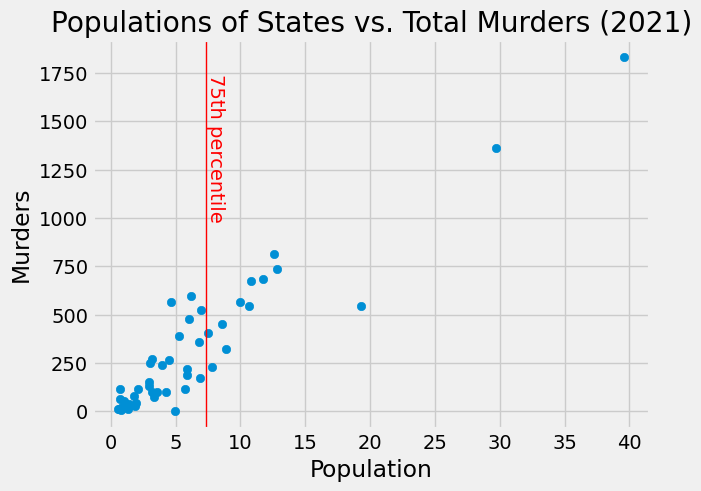

In [68]:
plt.scatter(crimes["population_21"]/1000000, crimes["total_murders"])
plt.axvline(percentile_pop_75, color = 'red', lw = 1)  #draws a vertical line at the 75th percentile
plt.text(percentile_pop_75,1000,'75th percentile',rotation=-90, color = 'red')

plt.xlabel('Population')
plt.ylabel('Murders')
plt.title('Populations of States vs. Total Murders (2021)');

In [69]:
#Get the correlations for the table
crimes_corr = crimes.corr(numeric_only = True)
crimes_corr

,population_21,total_murders,total_firearms,handguns,rifles,shotguns,firearms_unknown,knives_or_cutting_instruments,other_weapons
population_21,1.000000,0.934586,0.897933,0.876643,0.576048,0.830661,0.736914,0.966101,0.893393
total_murders,0.934586,1.000000,0.992935,0.954889,0.701522,0.858934,0.842862,0.915136,0.924095
total_firearms,0.897933,0.992935,1.000000,0.963856,0.718890,0.834351,0.844951,0.867400,0.888506
handguns,0.876643,0.954889,0.963856,1.000000,0.610805,0.757576,0.673627,0.838487,0.836648
rifles,0.576048,0.701522,0.718890,0.610805,1.000000,0.547462,0.725721,0.594391,0.578348
shotguns,0.830661,0.858934,0.834351,0.757576,0.547462,1.000000,0.789195,0.812356,0.837742
firearms_unknown,0.736914,0.842862,0.844951,0.673627,0.725721,0.789195,1.000000,0.721013,0.794375
knives_or_cutting_instruments,0.966101,0.915136,0.867400,0.838487,0.594391,0.812356,0.721013,1.000000,0.873614
other_weapons,0.893393,0.924095,0.888506,0.836648,0.578348,0.837742,0.794375,0.873614,1.000000


In [70]:
#Get the correlation coefficient for the 2 variables of interest
r_pop_total_murders = crimes_corr['population_21']['total_murders']
r_pop_total_murders 

0.9345857988567493

Yup!  That correlation coefficent a very strong positive linear association!

---

## Question 8

A) Below, create a histogram that shows the distribution across all states of crimes involving knives/cutting instrucments vs. other weapons.  Be sure to incorporate all important elements as discussed in this lab.


Try not to look at this till you're done, but here's my chart:  [Click here for my answer.](https://raw.githubusercontent.com/kathleen-ryan-DeSales/CS260/main/crimes_knives_other.PNG)

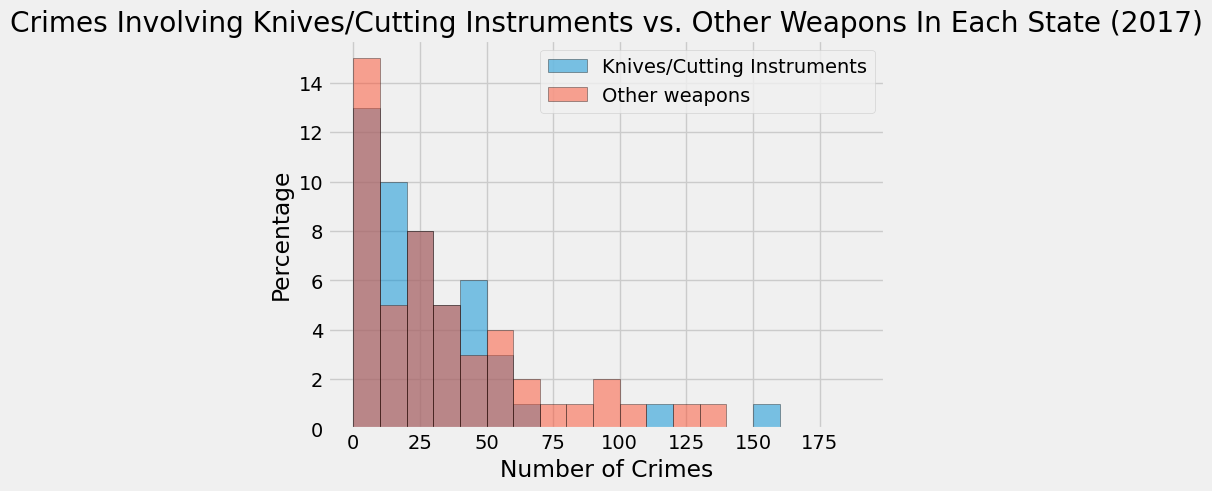

In [71]:
#Your answer here
plt.hist(crimes["knives_or_cutting_instruments"], np.arange(0, 200, 10), alpha = 0.5, ec = 'black', label = 'Knives/Cutting Instruments')
plt.hist(crimes["other_weapons"], np.arange(0, 200, 10), alpha = 0.5, ec = 'black', label = 'Other weapons')
plt.xticks(np.arange(0, 200, 25))
plt.xlabel('Number of Crimes')
plt.ylabel('Percentage')
plt.title('Crimes Involving Knives/Cutting Instruments vs. Other Weapons In Each State (2017)')
plt.legend();

B) Do the distributions appear similar or different? Discuss.

*They do seem to look familar, but there does seem to be more muders with weapons more often than knifes/cutting instruments.*

Click __here__ for one viable answer.

<!--
There seems to be very similar trends across the states for how many crimes occur in both of these categories.  States mostly have 0-50 incidences of each of these types of crimes per year, with some outlier states having more than that.
-->

---

In [72]:
#now close previous connection - run this cell
conn.close()

---

#  Suggestions for Cheat sheet

Do you have examples of these in your cheat sheet?

* How to make a histogram
* How to use zorder
* How to plot a red triangle to distinguish some special factor
* How to plot a vertical line
* How to use alpha
* How to use the describe function

---
Another one bites the dust!  Pat yourself on the back for one more lab well done.